In [1]:
# Please visit:
#
# https://download.nkg-mn.com/credo/anomalies/
#
# Pretrained dots_v2.h5 and others can be downloaded from mentioned website.

In [2]:
from commons import *
from dataset_loader import load_from_file
from IPython.display import display
import matplotlib.pyplot as plt
import cv2

DOTS_DST = 'cache/dots_v2.pickle'
TRACKS_DST = 'cache/tracks_v2.pickle'
WORMS_DST = 'cache/worms_v2.pickle'
ARTIFACTS_DST = 'cache/artifacts_v2.pickle'

DOTS_AC = 'cache/dots_v2_kl.h5'
TRACKS_AC = 'cache/tracks_v2_kl.h5'
WORMS_AC = 'cache/worms_v2_kl.h5'
ARTIFACTS_AC = 'cache/artifacts_v2_kl.h5'


def train_and_test(train_set, validation_set, fn):

    autoencoder = original_autoencoder(kl=True)
    autoencoder = train_or_cache(train_set, autoencoder, fn, validation_set=validation_set, force_train=True, kl=True)

    # test załadowania autoenkodera po zapisaniu
    from keras.models import load_model
    load_model(fn, custom_objects={'kl_divergence': tf.keras.losses.KLDivergence})

    for df_func, df_name in zip(
            [dm_func_mean],
            ['mean']
    ):
        for img_set, set_names in zip([validation_set], ['train']):
            decoded = autoencoder.predict(img_set)

            vis, errors = visualize_predictions(decoded, img_set, df_func, False, 16)
            img_path = fn.replace('.h5', '-vis.png')
            hist_path = fn.replace('.h5', '-hist.png')
            cv2.imwrite(img_path, vis)
            display(Image.open(img_path))
            if len(img_set) > 256:
                vis, errors = visualize_predictions(decoded, img_set, df_func, False)
                img_path = fn.replace('.h5', '-vis_full.png')
                cv2.imwrite(img_path, vis)

            plt.figure(figsize=(8,6))
            plt.hist(errors, bins=100, alpha=0.5, label=set_names)
            plt.xlabel("Data", size=14)
            plt.ylabel("Count", size=14)
            plt.title(df_name)
            plt.legend(loc='upper right')
            plt.savefig(hist_path)


def load_and_train(src, out):
    images, augmented = load_from_file(src)
    train_and_test(np.expand_dims(augmented, axis=-1), np.expand_dims(images, axis=-1), out)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/50
1290/1290 [==============================] - 17s 11ms/step - loss: 0.0059 - kullback_leibler_divergence: 2.1279e-04 - val_loss: 3.9395e-05 - val_kullback_leibler_divergence: 1.4282e-04
Epoch 2/50
1290/1290 [==============================] - 15s 11ms/step - loss: 2.4999e-05 - kullback_leibler_divergence: 1.0132e-04 - val_loss: 3.2341e-05 - val_kullback_leibler_divergence: 2.7879e-04
Epoch 3/50
1290/1290 [==============================] - 15s 11ms/step - loss: 1.1516e-05 - kullback_leibler_divergence: 6.9660e-05 - val_loss: 3.4902e-05 - val_kullback_leibler_divergence: 3.1889e-04
Epoch 4/50
1290/1290 [==============================] - 15s 11ms/step - loss: 7.7638e-06 - kullback_leibler_divergence: 5.6454e-05 - val_loss: 1.4414e-05 - val_kullback_leibler_divergence: 1.5492e-04
Epoch 5/50
1290/1290 [==============================] - 15s 11ms/step - loss: 6.8843e-06 - kullback_leibler_divergence: 4.8661e-05 - val

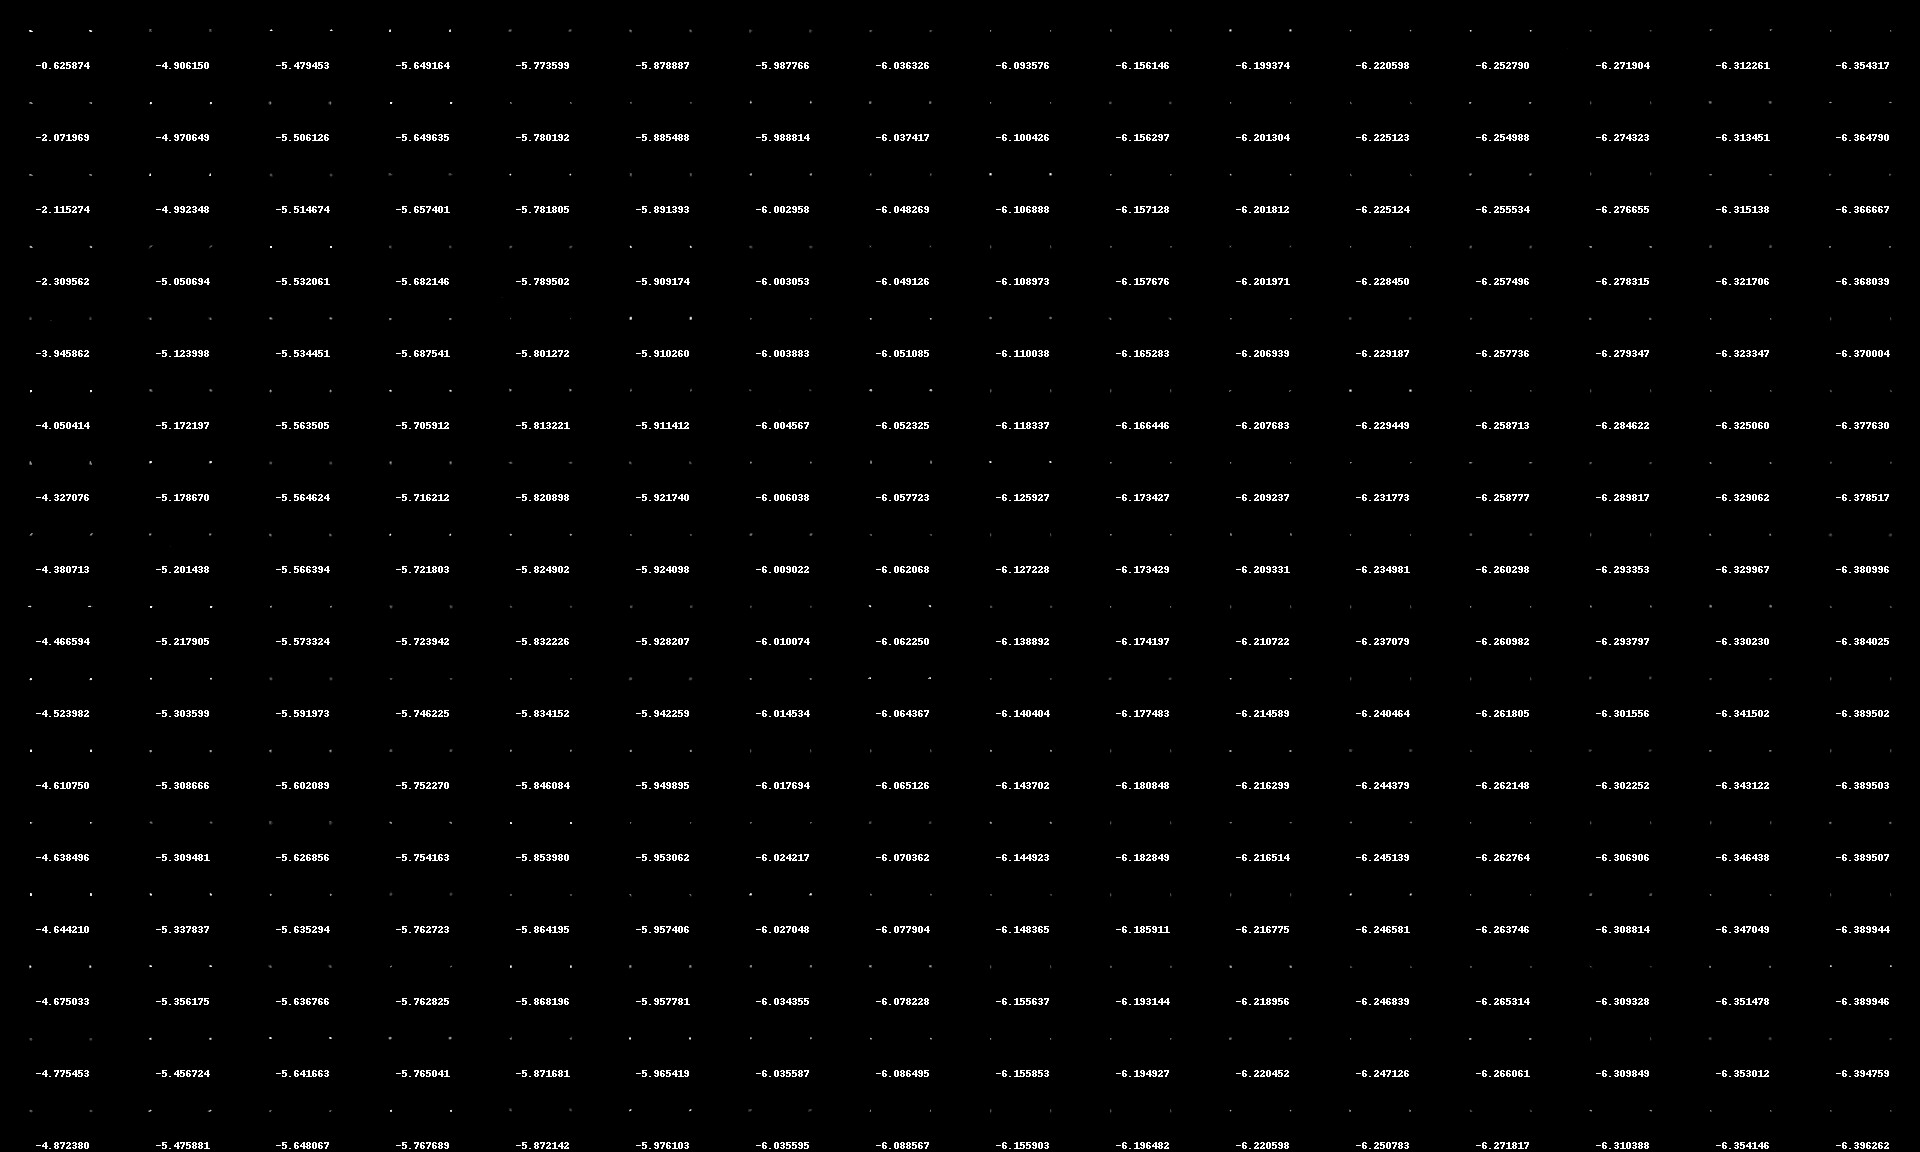

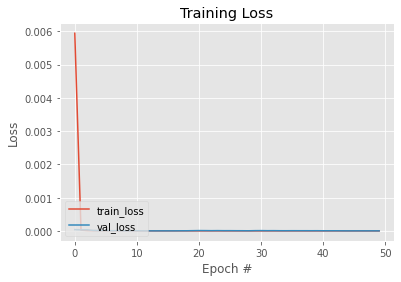

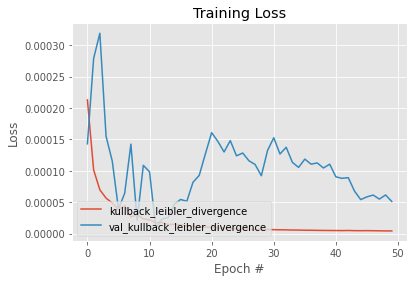

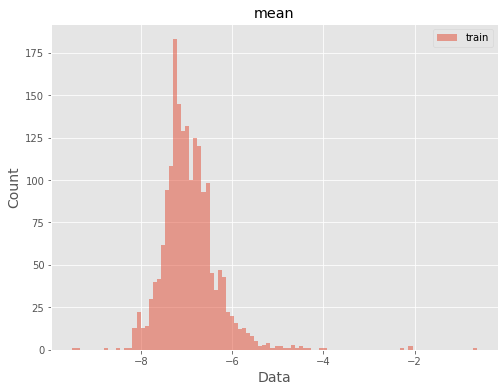

In [3]:
load_and_train(DOTS_DST, DOTS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/50
2108/2108 [==============================] - 25s 11ms/step - loss: 0.0037 - kullback_leibler_divergence: 0.0016 - val_loss: 1.8827e-04 - val_kullback_leibler_divergence: 8.6275e-04
Epoch 2/50
2108/2108 [==============================] - 24s 11ms/step - loss: 9.4579e-05 - kullback_leibler_divergence: 6.3203e-04 - val_loss: 1.0111e-04 - val_kullback_leibler_divergence: 6.2388e-04
Epoch 3/50
2108/2108 [==============================] - 24s 11ms/step - loss: 6.4922e-05 - kullback_leibler_divergence: 4.2420e-04 - val_loss: 5.3424e-04 - val_kullback_leibler_divergence: 7.8736e-04
Epoch 4/50
2108/2108 [==============================] - 24s 11ms/step - loss: 5.6801e-05 - kullback_leibler_divergence: 3.7366e-04 - val_loss: 9.6835e-05 - val_kullback_leibler_divergence: 6.1486e-04
Epoch 5/50
2108/2108 [==============================] - 24s 11ms/step - loss: 5.1457e-05 - kullback_leibler_divergence: 3.4414e-04 - val_los

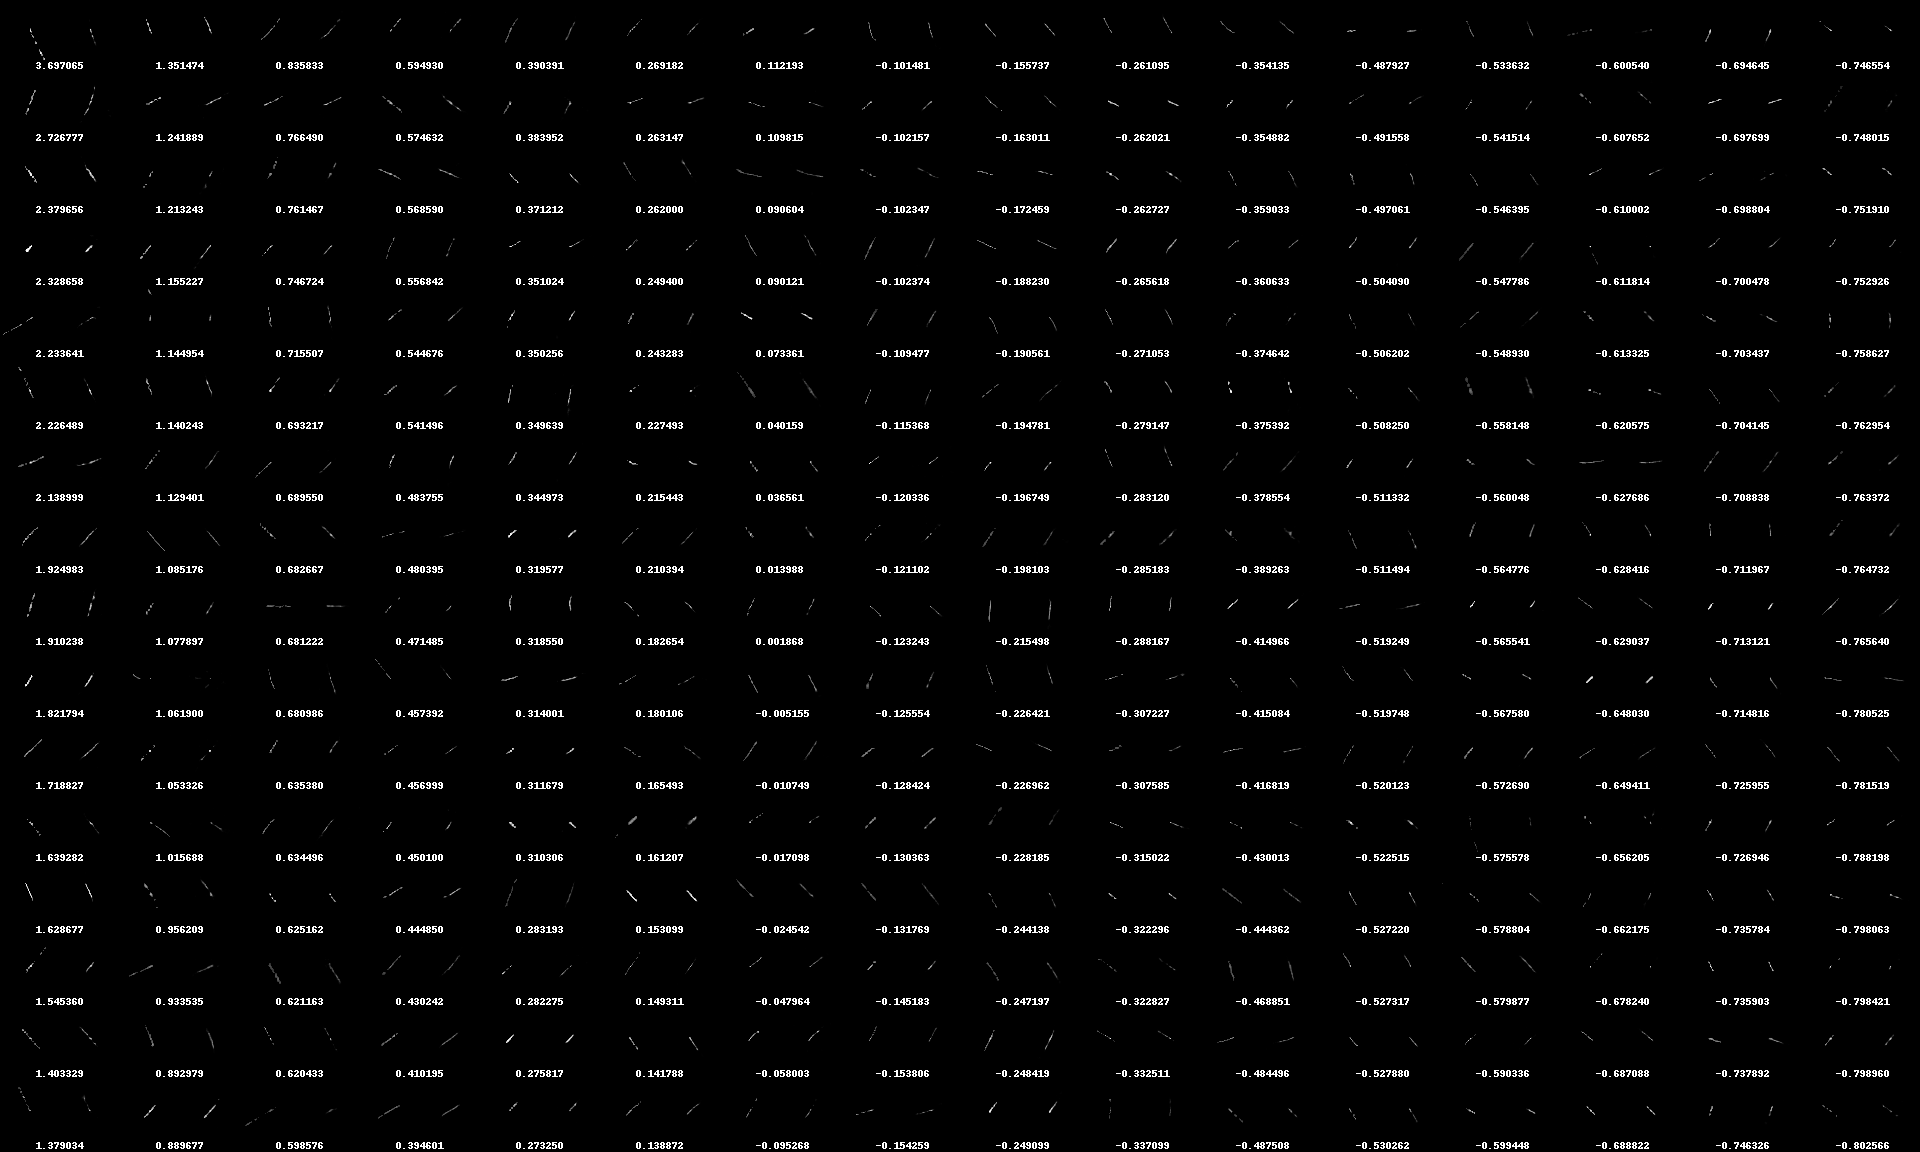

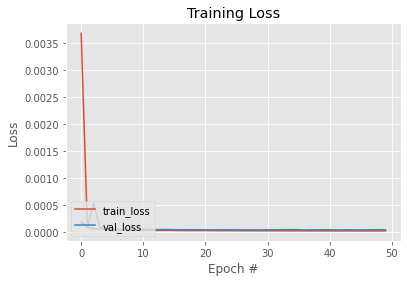

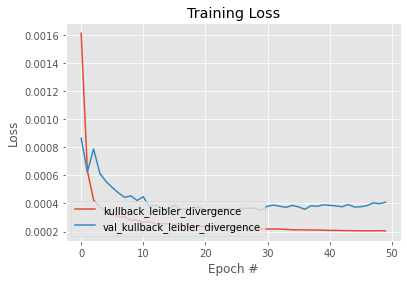

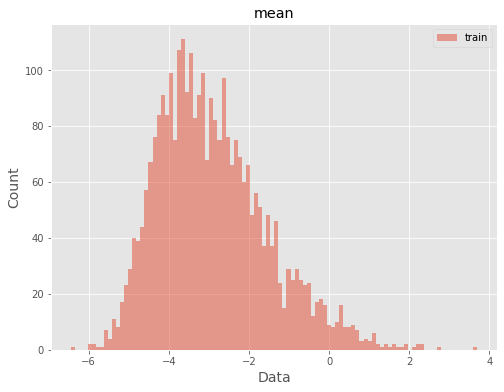

In [4]:
load_and_train(TRACKS_DST, TRACKS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0310 - kullback_leibler_divergence: 0.0033 - val_loss: 0.0145 - val_kullback_leibler_divergence: 0.0051
Epoch 2/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0136 - kullback_leibler_divergence: 0.0048 - val_loss: 0.0133 - val_kullback_leibler_divergence: 0.0044
Epoch 3/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0131 - kullback_leibler_divergence: 0.0039 - val_loss: 0.0131 - val_kullback_leibler_divergence: 0.0032
Epoch 4/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0129 - kullback_leibler_divergence: 0.0021 - val_loss: 0.0131 - val_kullback_leibler_divergence: 0.0011
Epoch 5/50
341/341 [==============================] - 4s 11ms/step - loss: 0.0070 - kullback_leibler_divergence: 0.0057 - val_loss: 7.4555e-04 - val_kullback_leibler_divergence: 0.0027
Epoch 6/50
341/341 [===

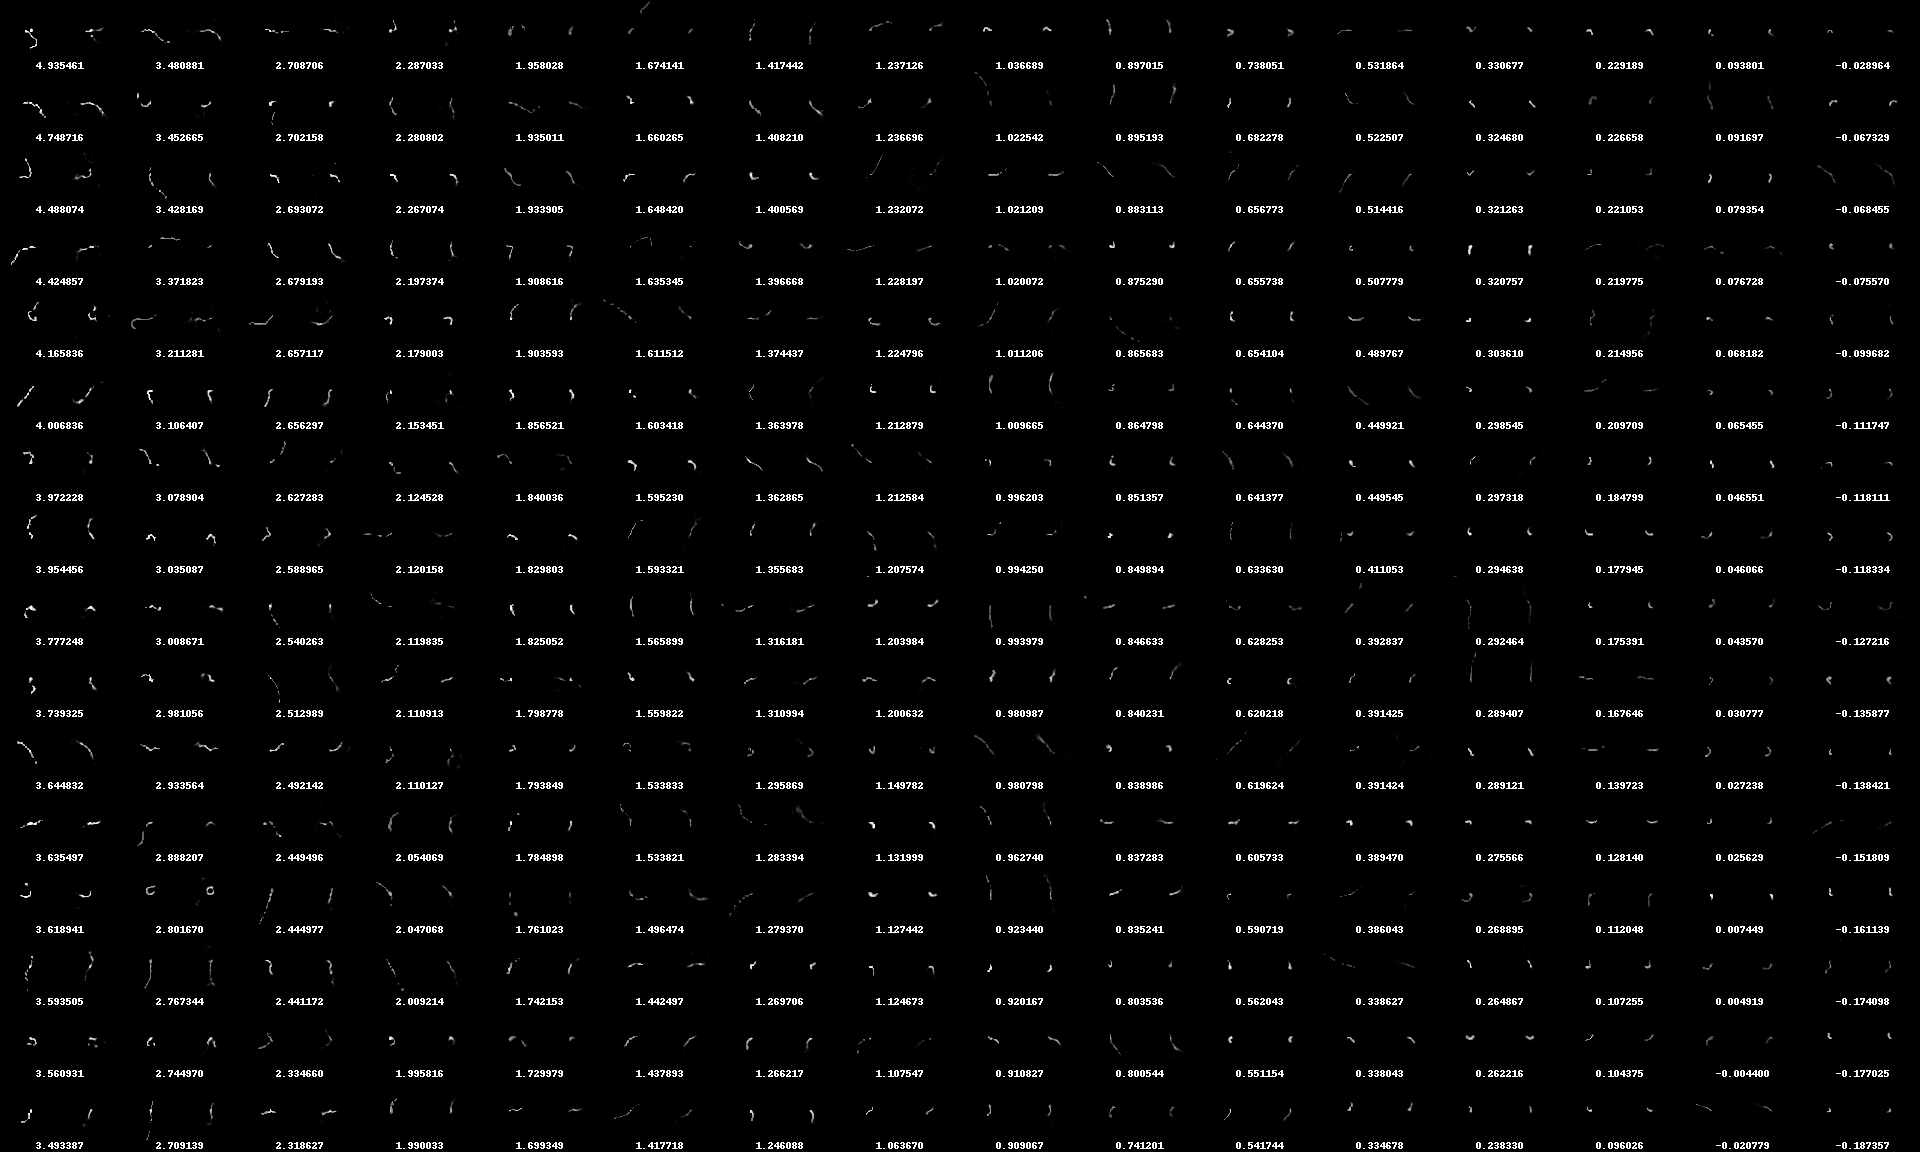

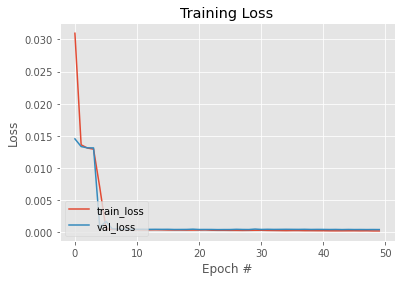

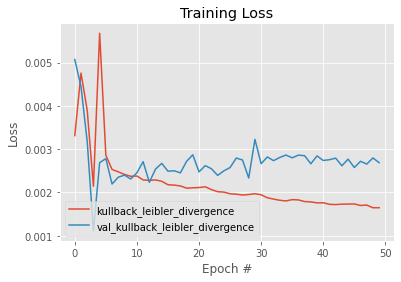

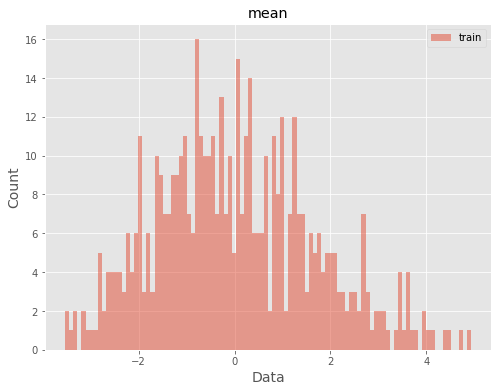

In [5]:
load_and_train(WORMS_DST, WORMS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/50
445/445 [==============================] - 6s 12ms/step - loss: 0.0370 - kullback_leibler_divergence: 0.0032 - val_loss: 0.0192 - val_kullback_leibler_divergence: 0.0052
Epoch 2/50
445/445 [==============================] - 5s 11ms/step - loss: 0.0040 - kullback_leibler_divergence: 0.0053 - val_loss: 6.9367e-04 - val_kullback_leibler_divergence: 0.0053
Epoch 3/50
445/445 [==============================] - 5s 12ms/step - loss: 5.5650e-04 - kullback_leibler_divergence: 0.0041 - val_loss: 7.0900e-04 - val_kullback_leibler_divergence: 0.0050
Epoch 4/50
445/445 [==============================] - 5s 12ms/step - loss: 3.9235e-04 - kullback_leibler_divergence: 0.0031 - val_loss: 0.0014 - val_kullback_leibler_divergence: 0.0056
Epoch 5/50
445/445 [==============================] - 5s 11ms/step - loss: 3.4735e-04 - kullback_leibler_divergence: 0.0028 - val_loss: 7.9081e-04 - val_kullback_leibler_divergence: 0.0045
Epo

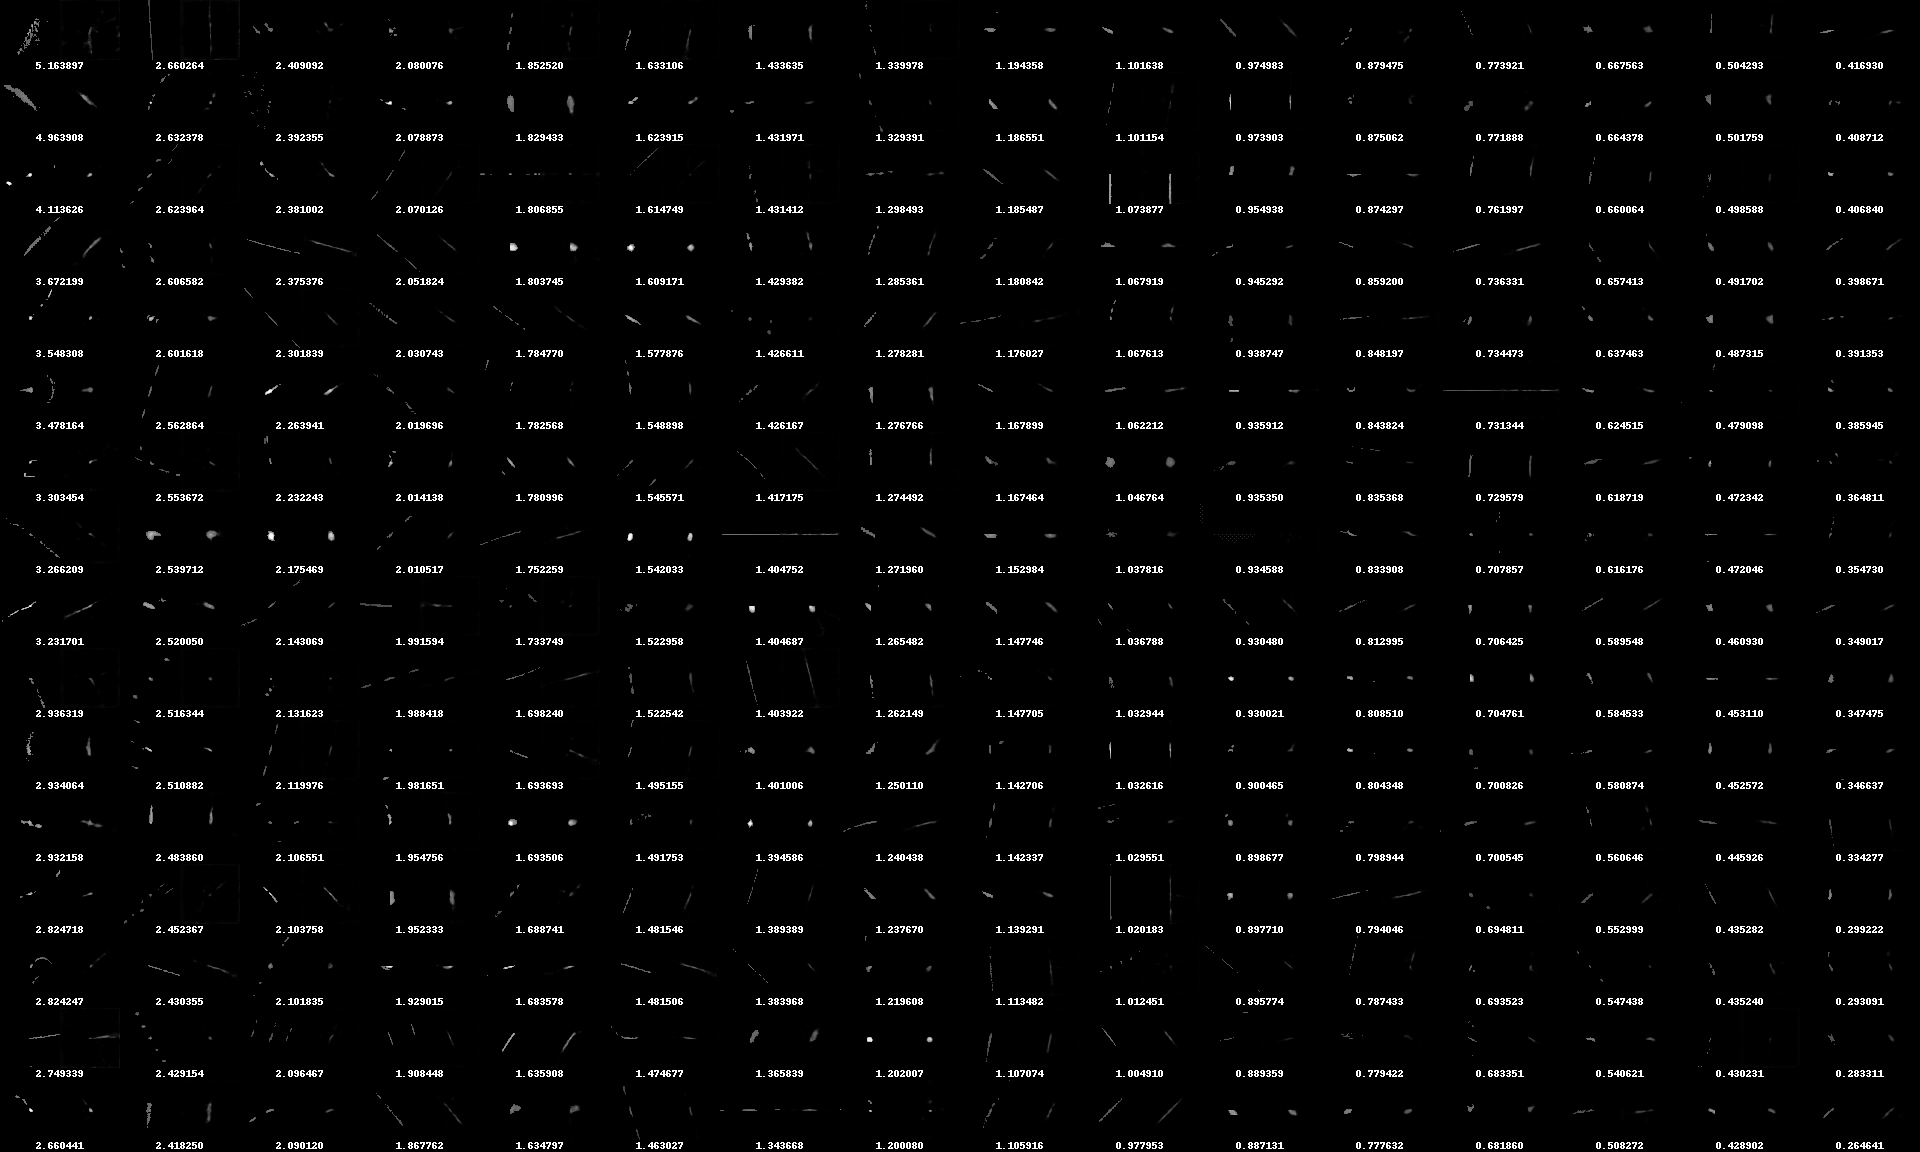

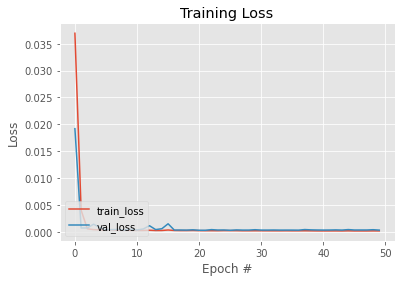

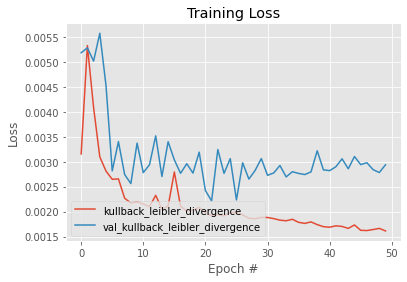

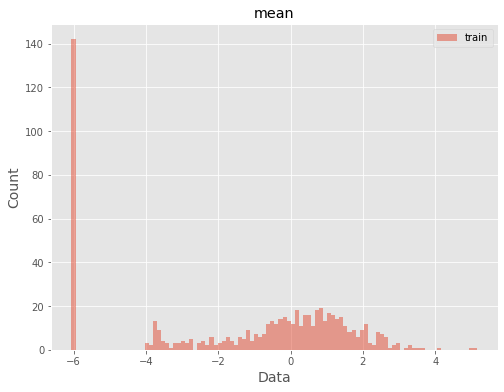

In [6]:
load_and_train(ARTIFACTS_DST, ARTIFACTS_AC)